# Task 1: Prediction using Supervised ML

## Simple Linear Regression using Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions

We are trying to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## 1. Read Data

In [16]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 2. Data Visualization

Plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data

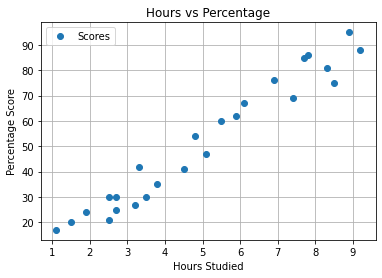

In [18]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

We can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## 3. Data Preparation

Divide the data into "attributes" (inputs) and "labels" (outputs).

In [19]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

Split this data into training and test sets

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

## 4. Model Training

In [21]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## 5. Plot the Regression Line

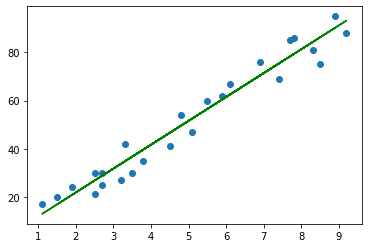

In [22]:
#plotting the regression line
line=model.coef_*X+model.intercept_

#plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='green');
plt.show()

## 6. Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [23]:
# testing data
print(X_test)

#model prediction
y_pred=model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
# comparing Actual vs Predicted
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


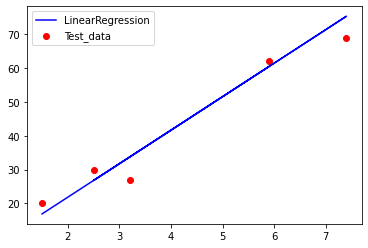

In [25]:
# Plotting on Test Data

plt.plot(X_test ,y_pred , label = 'LinearRegression' , color = 'b')
plt.scatter (X_test , y_test , label = 'Test_data' , color = 'r'  )
plt.legend()
plt.show()

### Test with your own data

In [26]:
hrs=np.array([9.25])
own_pred=model.predict(hrs.reshape(1,-1))
print("No of hours = {}".format(hrs))
print("Predicted Score = {}".format(own_pred[0]))

No of hours = [9.25]
Predicted Score = 93.69173248737538


## 7.Evaluating the model

Estimating training and test score

In [27]:
print("Training Score", model.score(X_train,y_train))
print('Test Score', model.score(X_test,y_test))

Training Score 0.9515510725211552
Test Score 0.9454906892105356


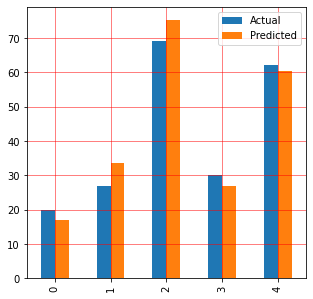

In [28]:
data.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

Compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error

In [29]:
print("Mean Absolute Errorr:",metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Errorr: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
